# 3장. 신경망

## 3.2 활성화 함수

### 3.2.2 계단 함수 구현하기

In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [2]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [4]:
import numpy as np

x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [5]:
y = x > 0
y

array([False,  True,  True])

In [6]:
y = y.astype(int)
y

array([0, 1, 1])

### 3.2.3 계단 함수의 그래프

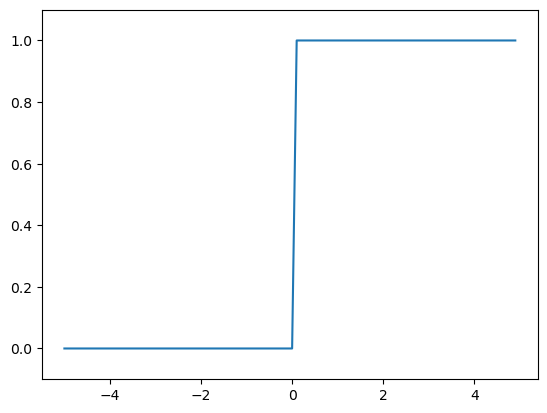

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=int)
# x가 0보다 큰지 검사하여 true, false 라는 결과를 받는다. true 는 1로 false 는 0으로 변환한다.

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

### 3.2.4 시그모이드 함수 구현하기

***sigmoid.py***

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [9]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [10]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [11]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

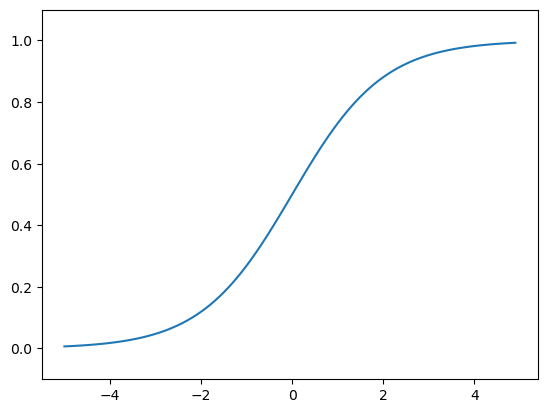

In [12]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)       # sigmoid() 함수로 변경
plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축 범위 지정
plt.show()

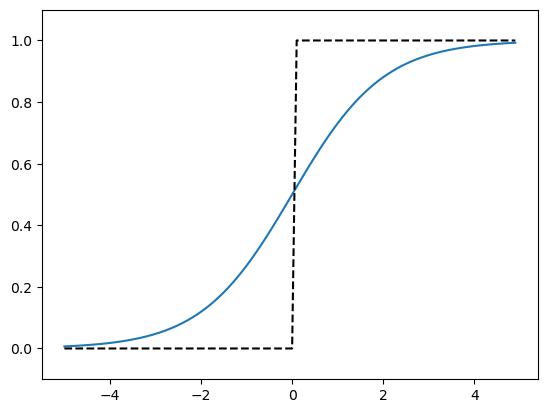

In [13]:
# [그림 3-8] 그리기
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

### 3.2.7 ReLU 함수

$$f(x) = \max(0, x)$$

In [15]:
def relu(x):
    return np.maximum(0, x)

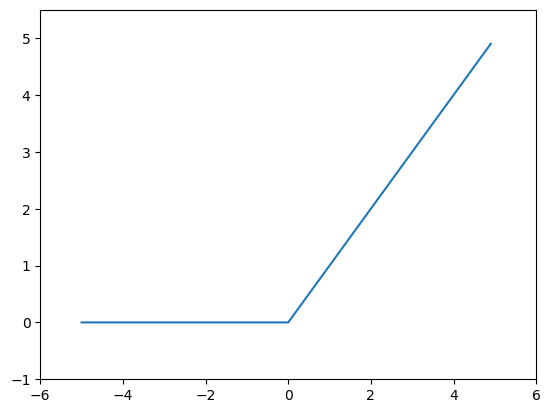

In [16]:
# [그림 3-9] 그리기
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.xlim(-6, 6)    # x축 범위 지정
plt.ylim(-1, 5.5)  # y축 범위 지정
plt.show()

## 3.3 다차원 배열의 계산

### 3.3.1 다차원 배열

In [17]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [18]:
np.ndim(A)

1

In [19]:
A.shape

(4,)

In [21]:
A.shape[0]

4

In [22]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [23]:
np.ndim(B)

2

In [24]:
B.shape

(3, 2)

### 3.3.2 행렬의 곱

In [43]:
A = np.array([[1, 2], [3, 4]])
print(A)
print(A.shape)

[[1 2]
 [3 4]]
(2, 2)


In [42]:
B = np.array([[5, 6], [7, 8]])
print(B)
print(B.shape)

[[5 6]
 [7 8]]
(2, 2)


In [27]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [31]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)
print(A)

(2, 3)
[[1 2 3]
 [4 5 6]]


In [32]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B.shape)
print(B)

(3, 2)
[[1 2]
 [3 4]
 [5 6]]


In [33]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [37]:
C = np.array([[1, 2], [3, 4]])
print(C.shape)
print(C)

(2, 2)
[[1 2]
 [3 4]]


In [36]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)
print(A)

(2, 3)
[[1 2 3]
 [4 5 6]]


In [38]:
# 다음 코드는 주석을 풀어 실행하면 ValueError를 일으킵니다.
np.dot(A, C)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [45]:
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A)
print(A.shape)

[[1 2]
 [3 4]
 [5 6]]
(3, 2)


In [ ]:
B = np.array([7, 8])
print(B)
print(B.shape) # NumPy는 B를 수학적인 열 벡터처럼 취급하여 계산을 수행

[7 8]
(2,)


In [41]:
np.dot(A, B)

array([23, 53, 83])

## 3.4 3층 신경망 구현하기

### 3.4.2 각 층의 신호 전달 구현하기

In [50]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
print(W1)
print(B1)
print(W1.shape)  # (2, 3)

[[0.1 0.3 0.5]
 [0.2 0.4 0.6]]
[0.1 0.2 0.3]
(2, 3)


In [47]:
print(X.shape) 

(2,)


In [48]:
print(B1.shape) 

(3,)


In [52]:
A1 = np.dot(X, W1)
print(A1)

[0.2 0.5 0.8]


In [53]:
Z1 = sigmoid(A1)

print(A1)  # [0.3, 0.7, 1.1]

[0.2 0.5 0.8]


In [54]:
print(Z1) 

[0.549834   0.62245933 0.68997448]


In [55]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)  # (3,)

(3,)


In [56]:
print(W2)
print(W2.shape)

[[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]]
(3, 2)


In [57]:
print(B2)
print(B2.shape)

[0.1 0.2]
(2,)


In [59]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2)
print(Z2.shape)

[0.61927394 0.75862356]
(2,)


In [61]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)  # 혹은 Y = A3
print(Y)
print(Y.shape)

[0.3136521 0.6892316]
(2,)


### 3.4.3 구현 정리

In [ ]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])

    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])

    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)

    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

In [63]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 출력층 설계하기

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

In [64]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)  # 지수 함수
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [65]:
sum_exp_a = np.sum(exp_a)  # 지수 함수의 합
print(sum_exp_a)

74.1221542101633


In [66]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [67]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.2 소프트맥스 함수 구현 시 주의점

In [68]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

C:\Users\hhnur\AppData\Local\Temp\ipykernel_48020\832863605.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
C:\Users\hhnur\AppData\Local\Temp\ipykernel_48020\832863605.py:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [69]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [70]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [71]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.3 소프트맥스 함수의 특징

In [72]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)

print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

## 3.6 손글씨 숫자 인식

- 전체적인 흐름
    1. 데이터 가져오기 : TensorFlow 에서 MNIST 원본 데이터를 내려받는다.
    2. 데이터 다듬기 : 2차원 이미지를 1차원으로 Flatten, 숫자를 0~1 사이로 Normalize
    3. 저장 및 불러오기 : 가공된 데이터를 pickle 이라는 형식으로 컴퓨터에 저장하고 필요할 때마다 빠르게 꺼내 쓴다.

- 주요 개념 및 함수
    1. pickle
        pickle.dump 와 pickle.load 를 통해 파이썬의 객체(리스트, 딕셔너리)를 그대로 파일로 저장하는 방식이다.
    2. Flattening
        reshape(train_images.shape[0], -1)
        - 원본 : $28 \times 28$ 크기의 2차원 이미지
        - 가공 후 : 78개의 숫자가 한 줄로 늘어선 1차원 배열
    3. Normalization
        dataset[key] /= 255.0
        - 이미지의 각 픽셀은 0(검은색) ~ 255(흰색) 사이의 값을 가진다.
        - 이를 255로 나누어 0.0 ~ 1.0 사이의 값으로 만든다.
    4. One-Hot Encoding
        _change_one_hot_label(X)
        - 일반 레이블 : 숫자 7
        - 원-핫 레이블 : [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


***dataset/mnist.py***  

In [ ]:
import urllib.request
import os
import os.path
import pickle
import numpy as np
import keras

mnist = tf.keras.datasets.mnist
save_file = os.getcwd() + "/mnist.pkl"

def _convert_numpy():
    dataset = {}

    # 데이터 불러오기

    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    # TensorFlow 라이브러리를 통해 MNIST 데이터를 인터넷에서 내려받거나 로컬에서 가져온다.
    # 언패킹(Unpacking): 훈련용(train) 데이터 6만 개와 시험용(test) 데이터 1만 개를 각각 이미지와 정답(label)으로 나누어 변수에 저장
    # 이때 train_images 의 모양은 (60000,28,28) 이다.
    
    # 이미지 데이터 평탄화
    dataset['train_img'] = train_images.reshape(train_images.shape[0], -1)
    # train_images.shape[0] : 이미지의 개수(60,000)
    # -1 때문에 결과적으로 (60000, 784) 행렬이 만들어진다.
    dataset['train_label'] = train_labels
    dataset['test_img'] = test_images.reshape(test_images.shape[0], -1)
    dataset['test_label'] = test_labels

    return dataset

def init_mnist():
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        # 'wb' : Write Binary
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    
    T = np.zeros((X.size, 10))
    # X.size: 들어온 정답의 개수 (예: 훈련 데이터라면 60,000개)'
    # 10: 우리가 분류할 숫자가 0부터 9까지 총 10개
    # np.zeros: 모든 칸이 0으로 채워진 (60000, 10) 크기의 행렬. 일단 모든 숫자를 초기화
    for idx, row in enumerate(T):
    # T라는 큰 표에서 줄 번호(idx)와 그 줄의 내용(row)을 동시에 하나씩 꺼내준다.
    # 첫 번째 반복이라면 idx는 0이 되고, row는 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]이 된다.
        row[X[idx]] = 1
        # X[idx]: 실제 정답 숫자. 만약 첫 번째 이미지(idx=0)의 정답이 5였다면, X[0]은 5가 된다.
        # row[5] = 1: 아까 꺼낸 0으로 가득 찬 10개짜리 방 중에서, 5번 방에만 1을 넣는다.
    return T


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNIST 데이터셋 읽기

    Parameters
    ----------
    normalize : 이미지의 픽셀 값을 0.0~1.0 사이의 값으로 정규화할지 정한다.
    one_hot_label :
        one_hot_label이 True면、레이블을 원-핫(one-hot) 배열로 돌려준다.
        one-hot 배열은 예를 들어 [0,0,1,0,0,0,0,0,0,0]처럼 한 원소만 1인 배열이다.
    flatten : 입력 이미지를 1차원 배열로 만들지를 정한다.

    Returns
    -------
    (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)
    """
    if not os.path.exists(save_file):
        init_mnist()
    # 만약 'mnist.pkl' 파일이 없으면 저장 함수를 실행

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    # 파일 안에 들어있는 0과 1의 이진 데이터(바이너리)를 쭉 읽어 들입니다.
    # 이 데이터를 해석해서 원래의 파이썬 딕셔너리와 넘파이 행렬 구조로 다시 조립(역직렬화)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)
    # reshape(-1, 1, 28, 28)은 데이터를 4차원 행렬로 만들겠다는 의미
    # 1 (채널 수, Channel): 흑백 이미지 (컬러 이미지라면 RGB 3채널이므로 3이 들어갑니다.)
    # 28 (높이, Height): 이미지의 세로 픽셀 수
    # 28 (너비, Width): 이미지의 가로 픽셀 수
    # if not flatten 조건문은 왜 있나?
        # flatten=True : (보통 일반 신경망/MLP용): 28x28 이미지를 한 줄로 쭉 늘어뜨린 784개의 숫자로 다룬다.
        # flatten=False (주로 CNN용): 이미지는 상하좌우 관계가 중요. 따라서 784개의 줄을 다시 28x28의 정사각형 모양으로 복구
    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])

In [ ]:
import urllib.request
import os
import os.path
import pickle
import numpy as np
# import keras

# mnist = tf.keras.datasets.mnist
import numpy as np
from torchvision import datasets  # PyTorch의 데이터셋 도구

# 기존 tf.keras.datasets.mnist를 대체할 객체 생성 (구조를 맞춰주기 위함)
class MNIST_Loader:
    def load_data(self):
        # PyTorch를 이용해 데이터를 내려받고 넘파이로 변환합니다.
        train_set = datasets.MNIST(root='./data', train=True, download=True)
        test_set = datasets.MNIST(root='./data', train=False, download=True)
        return (train_set.data.numpy(), train_set.targets.numpy()), \
               (test_set.data.numpy(), test_set.targets.numpy())

mnist = MNIST_Loader()

save_file = os.getcwd() + "/mnist.pkl"

def _convert_numpy():
    dataset = {}

    # 데이터 불러오기

    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    # TensorFlow 라이브러리를 통해 MNIST 데이터를 인터넷에서 내려받거나 로컬에서 가져온다.
    # 언패킹(Unpacking): 훈련용(train) 데이터 6만 개와 시험용(test) 데이터 1만 개를 각각 이미지와 정답(label)으로 나누어 변수에 저장
    # 이때 train_images 의 모양은 (60000,28,28) 이다.
    
    # 이미지 데이터 평탄화
    dataset['train_img'] = train_images.reshape(train_images.shape[0], -1)
    # train_images.shape[0] : 이미지의 개수(60,000)
    # -1 때문에 결과적으로 (60000, 784) 행렬이 만들어진다.
    dataset['train_label'] = train_labels
    dataset['test_img'] = test_images.reshape(test_images.shape[0], -1)
    dataset['test_label'] = test_labels

    return dataset

def init_mnist():
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        # 'wb' : Write Binary
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    
    T = np.zeros((X.size, 10))
    # X.size: 들어온 정답의 개수 (예: 훈련 데이터라면 60,000개)'
    # 10: 우리가 분류할 숫자가 0부터 9까지 총 10개
    # np.zeros: 모든 칸이 0으로 채워진 (60000, 10) 크기의 행렬. 일단 모든 숫자를 초기화
    for idx, row in enumerate(T):
    # T라는 큰 표에서 줄 번호(idx)와 그 줄의 내용(row)을 동시에 하나씩 꺼내준다.
    # 첫 번째 반복이라면 idx는 0이 되고, row는 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]이 된다.
        row[X[idx]] = 1
        # X[idx]: 실제 정답 숫자. 만약 첫 번째 이미지(idx=0)의 정답이 5였다면, X[0]은 5가 된다.
        # row[5] = 1: 아까 꺼낸 0으로 가득 찬 10개짜리 방 중에서, 5번 방에만 1을 넣는다.
    return T


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNIST 데이터셋 읽기

    Parameters
    ----------
    normalize : 이미지의 픽셀 값을 0.0~1.0 사이의 값으로 정규화할지 정한다.
    one_hot_label :
        one_hot_label이 True면、레이블을 원-핫(one-hot) 배열로 돌려준다.
        one-hot 배열은 예를 들어 [0,0,1,0,0,0,0,0,0,0]처럼 한 원소만 1인 배열이다.
    flatten : 입력 이미지를 1차원 배열로 만들지를 정한다.

    Returns
    -------
    (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)
    """
    if not os.path.exists(save_file):
        init_mnist()
    # 만약 'mnist.pkl' 파일이 없으면 저장 함수를 실행

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    # 파일 안에 들어있는 0과 1의 이진 데이터(바이너리)를 쭉 읽어들인다.
    # 이 데이터를 해석해서 원래의 파이썬 딕셔너리와 넘파이 행렬 구조로 다시 조립(역직렬화)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)
    # reshape(-1, 1, 28, 28)은 데이터를 4차원 행렬로 만들겠다는 의미
    # 1 (채널 수, Channel): 흑백 이미지 (컬러 이미지라면 RGB 3채널이므로 3이 들어갑니다.)
    # 28 (높이, Height): 이미지의 세로 픽셀 수
    # 28 (너비, Width): 이미지의 가로 픽셀 수
    # if not flatten 조건문은 왜 있나?
        # flatten=True : (보통 일반 신경망/MLP용): 28x28 이미지를 한 줄로 쭉 늘어뜨린 784개의 숫자로 다룬다.
        # flatten=False (주로 CNN용): 이미지는 상하좌우 관계가 중요. 따라서 784개의 줄을 다시 28x28의 정사각형 모양으로 복구
    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])

### 3.6.1 MNIST 데이터셋

In [20]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
np.set_printoptions(linewidth=200,threshold=1000)
print(x_train[0])  

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0
   0   0   0   

***mnist_show.py***

5
(784,)
(28, 28)


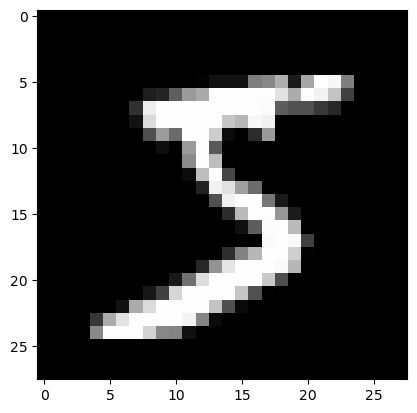

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def img_show(img):
    plt.imshow(img, cmap='gray')
    plt.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

img_show(img)

### 3.6.2 신경망의 추론 처리

***common/functions.py***

In [26]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True)  # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

***neuralnet_mnist.py***

In [29]:
import tensorflow as tf
import urllib.request
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    url = 'https://github.com/WegraLee/deep-learning-from-scratch/raw/refs/heads/master/ch03/sample_weight.pkl'
    urllib.request.urlretrieve(url, 'sample_weight.pkl')

    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t = get_data()
network = init_network() 

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [42]:
print(x_test.shape)
print(t_test.shape)

(10000, 784)
(10000,)


1. $W_1$ (입력층 $\rightarrow$ 은닉층 1)
    - 1만 장의 이미지가 784개의 픽셀 정보를 들고 들어옵니다.
    - 연산: $X \cdot W_1 + b_1$
    - 차원 변화: $(10000, \mathbf{784}) \times (\mathbf{784}, 50) = (10000, 50)$


2. $W_2$ (은닉층 1 $\rightarrow$ 은닉층 2)
    - 이제 50개의 특징 정보를 더 복잡한 정보로 조합할 차례입니다.
    - 연산: $z_1 \cdot W_2 + b_2$
    - 차원 변화: $(10000, \mathbf{50}) \times (\mathbf{50}, 100) = (10000, 100)$

    
3. $W_3$ (은닉층 2 $\rightarrow$ 출력층)
    - 마지막으로 100개의 복잡한 정보를 종합해 최종 정답(0~9)을 결정합니다.
    - 연산: $z_2 \cdot W_3 + b_3$
    - 차원 변화: $(10000, \mathbf{100}) \times (\mathbf{100}, 10) = (10000, 10)$

In [45]:
print(network['W1'])
print(f"W1 shape: {network['W1'].shape}")
print(f"W2 shape: {network['W2'].shape}")
print(f"W3 shape: {network['W3'].shape}")
print(f"b1 shape: {network['b1'].shape}")
print(f"b2 shape: {network['b2'].shape}")
print(type(network))   
print(network.keys())    

[[-0.00741249 -0.00790439 -0.01307499 ...  0.01978721 -0.04331266 -0.01350104]
 [-0.01029745 -0.01616653 -0.01228376 ...  0.01920228  0.02809811  0.01450908]
 [-0.01309184 -0.00244747 -0.0177224  ...  0.00944778  0.01387301  0.03393568]
 ...
 [ 0.02242565 -0.0296145  -0.06326169 ... -0.01012643  0.01120969  0.01027199]
 [-0.00761533  0.02028973 -0.01498873 ...  0.02735376 -0.01229855  0.02407041]
 [ 0.00027915 -0.06848375  0.00911191 ... -0.03183098  0.00743086 -0.04021148]]
W1 shape: (784, 50)
W2 shape: (50, 100)
W3 shape: (100, 10)
b1 shape: (50,)
b2 shape: (100,)
<class 'dict'>
dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])


### 3.6.3 배치 처리

In [46]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

x.shape

(10000, 784)

In [47]:
x[0].shape

(784,)

In [48]:
W1.shape

(784, 50)

In [49]:
W2.shape

(50, 100)

In [50]:
W3.shape

(100, 10)

***neuralnet_mnist_batch.py***

In [ ]:
x, t = get_data()
network = init_network()

batch_size = 100  # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    #가로 방향 (행 단위) 검사
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [61]:
print(x_batch.shape)
# (100, 784)X(784, 50)X(50, 100)X(100, 10)
print(y_batch.shape)
print(p.shape)

(100, 784)
(100, 10)
(100,)


In [51]:
list(range(0, 10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [52]:
list(range(0, 10, 3))

[0, 3, 6, 9]

In [ ]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6],
              [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
print(x)
y = np.argmax(x, axis=1)
# 가로 방향(행 단위) 검사
print(y)

[[0.1 0.8 0.1]
 [0.3 0.1 0.6]
 [0.2 0.5 0.3]
 [0.8 0.1 0.1]]
[1 2 1 0]


In [55]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)

[ True  True False  True]


In [56]:
np.sum(y==t)

3